## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("kc_house_data.csv")

In [4]:
# df.head()

In [5]:
# df[['yr_renovated']].head()

In [6]:
# df.info()

In [7]:
# df.T

In [8]:
#cleaning up sqft_basement data
clean = df.replace("?", np.nan)

In [9]:
clean['sqft_basement'] = clean['sqft_basement'].replace('?',np.nan).astype(float)

In [10]:
# type changes of two columns
clean["sqft_basement"].astype(float)
clean["date"] = pd.to_datetime(clean["date"])

In [11]:
# clean.info()

In [12]:
#exploring missing values
# clean.isna().sum()

In [13]:
# clean.isnull().sum()

In [14]:
#exploring missing values of 'view'
# condition_view=clean['view']!=np.nan
# clean.loc[condition_view,'view'].describe()   

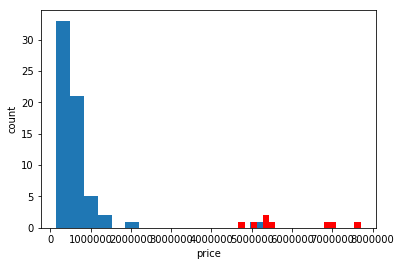

In [15]:
dataframe=clean.loc[clean['view'].isnull()==True]
plt.hist(dataframe['price'],bins=15)
plt.hist(clean.loc[clean['price']>4500000]['price'],bins=20,color='red')
plt.xlabel
plt.xlabel('price')
plt.ylabel('count')
plt.show()    #this is the reason why the points were not dropped as the price for the missing 'view' values
#were concentrated in the extreme ends and we wanted to make sure the points were included in our regression model.
# We see that one of the null view homes is one of very few high-value homes, making it useful in predicting the
# values on this end of the spectrum



In [16]:
# clean.columns

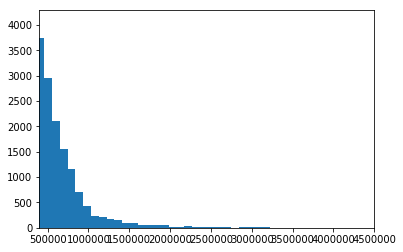

In [17]:
df_sqftbasement=clean.loc[clean['sqft_basement'].isna()==False]

plt.hist(df_sqftbasement['price'],bins=80)
plt.xlim(400000,4500000)

plt.show()

In [18]:
df_sqftbasement['sqft_basement'].describe()

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Since the null sqft_basement transactions are concentrated in the low end of our price (target value), we chose to retain these records and impute the median of 0.

In [19]:
clean['sqft_basement']=clean['sqft_basement'].replace(np.nan,0)

In [20]:
#cleaning yr_innovated
# clean.head()

In [21]:
# dataframe_yr=clean.loc[clean['yr_renovated'].isnull()].copy()

# dataframe_yr.loc[dataframe_yr['yr_renovated'].isna(),'yr_renovated']=(
#     dataframe_yr.loc[dataframe_yr['yr_renovated'].isnull(),'yr_built'])
# dataframe_yr.head()

In [22]:
clean.loc[clean['yr_renovated'].isna(),'yr_renovated']=(
    clean.loc[clean['yr_renovated'].isnull(),'yr_built'])

clean.loc[clean['yr_renovated']==0,'yr_renovated']=(
    clean.loc[clean['yr_renovated']==0,'yr_built'])
# clean.head()

In [23]:
clean['waterfront_clean']=clean['waterfront']
clean.loc[clean['waterfront_clean'].isna(),'waterfront_clean']=0
# clean.describe().T

In [24]:
# clean.columns

In [25]:
# def replace_yr_ren(yr_ren,yr_built):
#     """takes two lists and if yr_ren is np.nan, it returns yr_built"""
#     output=[]
#     for index,year in enumerate(yr_ren):
#         if year.isnull() or year==0:
#             output.append(yr_built[index])
#         else:
#             output.append(year)
#     return output

In [26]:
# clean[['yr_renovated','yr_built']].head()


In [27]:
# np.nan==None

In [28]:
# replace_yr_ren(clean['yr_renovated'],clean['yr_built'])

In [31]:
# np.array(replace_yr_ren(clean['yr_renovated'],clean['yr_built'])).value_counts()

In [32]:
# clean['yr_rennovated_clean'] = replace_yr_ren(clean['yr_renovated'],clean['yr_built'])
# clean.head()

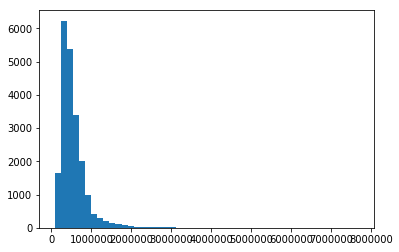

In [33]:
#graph for the price for the missing 'sqft_basement' values
plt.hist(df_sqftbasement['price'],bins=50)
plt.show()
#the graph shows us the missing sqft_basement are concentrated in low priced homes

In [34]:
#we could replace the np.nan values of 'view' with 0 but we would like to take a look..
#how the values of price change for the missing values of view


In [35]:
#creating a flag column for waterfront, first approach
clean["imputed_waterfront"] = clean["waterfront"].replace(np.nan, 0)

#creating a flag column for waterfront, second approach, needs error resolution
#clean["imputed_waterfront_2"] = clean.loc[clean["waterfront"] == np.nan]

#imputing waterfront records to median value, which is zero
clean["waterfront"].replace(np.nan, 0, inplace = True)

In [36]:
#check if a new column with a headline 'imputed_waterfront' is created
clean.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront_clean',
       'imputed_waterfront'],
      dtype='object')

In [37]:
#To view the two columns 'waterfront'
clean[['waterfront']].isna().sum()

waterfront    0
dtype: int64

In [38]:
clean['sqft_basement'].isna().sum()

0

In [39]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id                    21597 non-null int64
date                  21597 non-null datetime64[ns]
price                 21597 non-null float64
bedrooms              21597 non-null int64
bathrooms             21597 non-null float64
sqft_living           21597 non-null int64
sqft_lot              21597 non-null int64
floors                21597 non-null float64
waterfront            21597 non-null float64
view                  21534 non-null float64
condition             21597 non-null int64
grade                 21597 non-null int64
sqft_above            21597 non-null int64
sqft_basement         21597 non-null float64
yr_built              21597 non-null int64
yr_renovated          21597 non-null float64
zipcode               21597 non-null int64
lat                   21597 non-null float64
long                  21597 non-null float64
sqft_living15         21597 non-null int64
sqft